In [ ]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("iphone.csv")
print(df.shape)
df.head()

(3062, 11)


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [ ]:
#information of unique values of features
df.apply(lambda x: [x.nunique(), x.unique()]).T

,0,1
productAsin,7,"[B09G9BL5CP, B09P82T3PZ, B09G9J5JZX, B0CHX1W1X..."
country,7,"[India, Japan, United Arab Emirates, Egypt, Un..."
date,789,"[11-08-2024, 16-08-2024, 14-05-2024, 24-06-202..."
isVerified,2,"[True, False]"
ratingScore,5,"[4, 5, 3, 2, 1]"
reviewTitle,2018,"[No charger, iPhone 13 256GB, Flip camera opti..."
reviewDescription,2297,"[Every thing is good about iPhones, there's no..."
reviewUrl,2460,[https://www.amazon.in/gp/customer-reviews/R34...
reviewedIn,1255,"[Reviewed in India on 11 August 2024, Reviewed..."
variant,86,"[Colour: MidnightSize: 256 GB, Colour: PinkSiz..."


In [ ]:
# Generate a list of colors from the colormap
def shade_greens(n):
    cmap = plt.get_cmap('Greens_r', n)
    colors = [cmap(i) for i in range(n)]
    return colors

,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


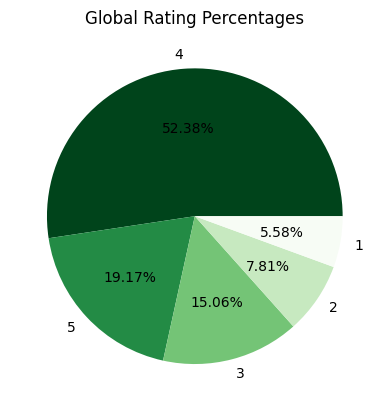

In [ ]:
display(df['ratingScore'].describe())
plt.pie(df['ratingScore'].value_counts()/df.shape[0],
        labels=df['ratingScore'].unique(), autopct='%.2f%%',
       colors=shade_greens(5))
plt.title("Global Rating Percentages")
plt.show()

,mean,mode_function,count
,ratingScore,ratingScore,ratingScore
country,,,
Egypt,5.000000,5,1
Mexico,4.909091,5,11
Canada,4.500000,5,4
United Arab Emirates,3.912500,5,80
India,3.810229,5,2229
United States,3.633851,5,579
Japan,3.310127,5,158


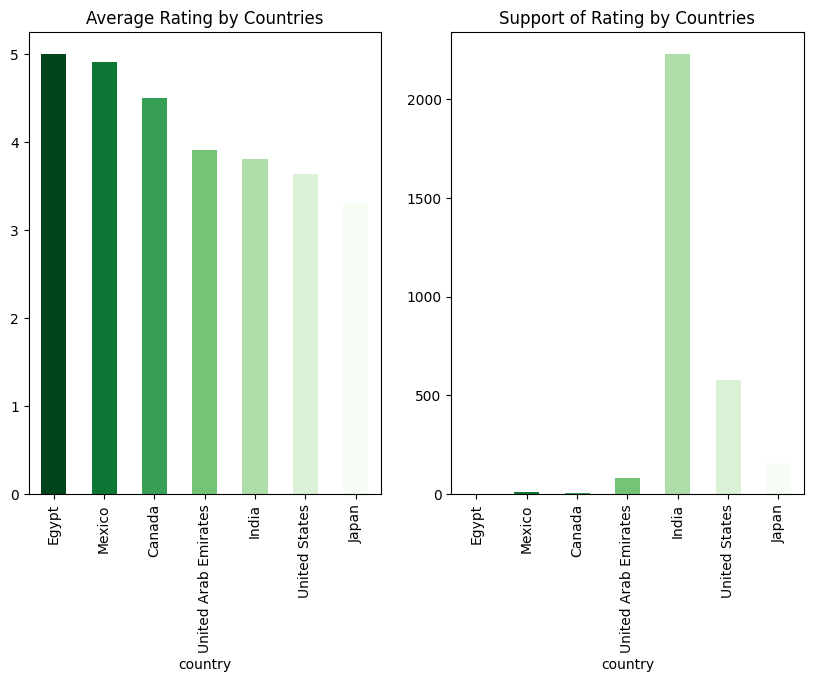

In [ ]:
def mode_function(x):
    return x.mode()[0]

g1 = pd.pivot_table(data=df, values='ratingScore', index='country', aggfunc=['mean', mode_function, 'count'])
g1 = g1.sort_values(by=('mean', 'ratingScore'), ascending=False)
display(g1)

#visualize
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

g1.loc[:, ('mean', 'ratingScore')].plot(kind='bar', color=shade_greens(7), title='Average Rating by Countries', ax=ax[0])
g1.loc[:, ('count', 'ratingScore')].plot(kind='bar', color=shade_greens(7), title='Support of Rating by Countries', ax=ax[1])
plt.show()

In [ ]:
df['variant'].unique()

array(['Colour: MidnightSize: 256 GB', 'Colour: PinkSize: 256 GB',
       'Colour: BlueSize: 256 GB', 'Colour: GreenSize: 256 GB',
       'Colour: PinkSize: 128 GB', 'Colour: StarlightSize: 256 GB',
       'Colour: GreenSize: 128 GB', 'Colour: StarlightSize: 128 GB',
       'Colour: MidnightSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 128 GB', 'Colour: BlueSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 256 GB',
       'Size: 256GBColor: (Product) RED', 'Size: 256GBColor: Pink',
       'Size: 256GBColor: Midnight', 'Size: 128GBColor: Pink',
       'Size: 128GBColor: blue', 'Size: 128GBColor: starlight',
       'Size: 128GBColor: Midnight', 'Size: 128GBColor: green',
       'Size: 128GBColor: (Product) RED', 'Size: 256GBColor: starlight',
       'Size: 256GBColor: blue', 'Size: 512GBColor: starlight',
       'Size: 512GBColor: (Product) RED', 'Size: 512 GBColour: Midnight',
       'Size: 128 GBColour: Blue', 'Size: 128 GBColour: Red',
       'Size: 256 GBColour: Red', 'Size: 512 

In [ ]:
def extract_variant_info(sample):
    pattern_1 = r'Colour:\s*(?:\(PRODUCT\)\s*)?(\w+)\s*Size:\s*(\d+ \w+)'
    pattern_2 = r'Size:\s*(\d+\w+)\s*Color:\s*(?:\(Product\)\s*)?(\w+)'
    pattern_3 = r'Service Provider:\s*([\w\s&-]+)Color:\s*(?:\(Product\)\s*)?([\w\s]+)Size:\s*(\d+\s*\w+)'

    match_1 = re.search(pattern_1, sample)
    match_2 = re.search(pattern_2, sample)
    match_3 = re.search(pattern_3, sample)

    color = None
    size = None
    provider = None

    if match_1:
        color = match_1.group(1)
        size = match_1.group(2)
    elif match_2:
        color = match_2.group(2)
        size = match_2.group(1)
    elif match_3:
        color = match_3.group(2)
        size = match_3.group(3)
        provider = match_3.group(1)
    else:
        sample = sample.lower()
        pattern_size = r'(\d+)\s?gb'

        colors = ['red', 'blue', 'pink','yellow', 'green', 'midnight', 'purple', 'starlight']
        pattern_color = r'\b(?:' + '|'.join(colors) + r')\b'

        size = re.findall(pattern_size, sample)
        if size:
            size = size[0]
        color = re.findall(pattern_color, sample)
        if color:
            color = color[0]
    variant_df.loc[len(variant_df)] = [color, size, provider]

sample = df['variant']
variant_df = pd.DataFrame(columns=['Color', 'Size', 'Service_Provider'])
for s in sample:
    extract_variant_info(s)

In [ ]:
print(variant_df.shape)
print(variant_df.isnull().sum())
print(variant_df.head())

(3062, 3)
Color                  0
Size                   0
Service_Provider    2468
dtype: int64
      Color    Size Service_Provider
0  Midnight  256 GB             None
1  Midnight  256 GB             None
2  Midnight  256 GB             None
3  Midnight  256 GB             None
4  Midnight  256 GB             None


In [ ]:
variant_df.Size.value_counts()

,count
Size,
128 GB,1453
256 GB,760
128GB,561
256GB,171
128,54
512GB,20
256,20
512 GB,16
512,7


In [ ]:
def extract_numbers(s):
    pattern_size = r'\b(\d+)\s?GB?\b'
    match = re.search(pattern_size, s)
    if match:
        number = match.group(1)
        return number
    else:
        return None
sizes = variant_df.Size.map(lambda x: extract_numbers(x))
variant_df['Size'] = sizes
sizes.value_counts()

,count
Size,
128,2014
256,931
512,36


In [ ]:
variant_df.Color.value_counts()

,count
Color,
Blue,597
Midnight,574
Starlight,438
Pink,316
Green,286
RED,264
Purple,199
Black,85
blue,79


In [ ]:
df_2 = pd.concat([df, variant_df], axis=1)
df_2.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,Color,Size,Service_Provider
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Midnight,256,None
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Midnight,256,None
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Midnight,256,None
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Midnight,256,None
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Midnight,256,None


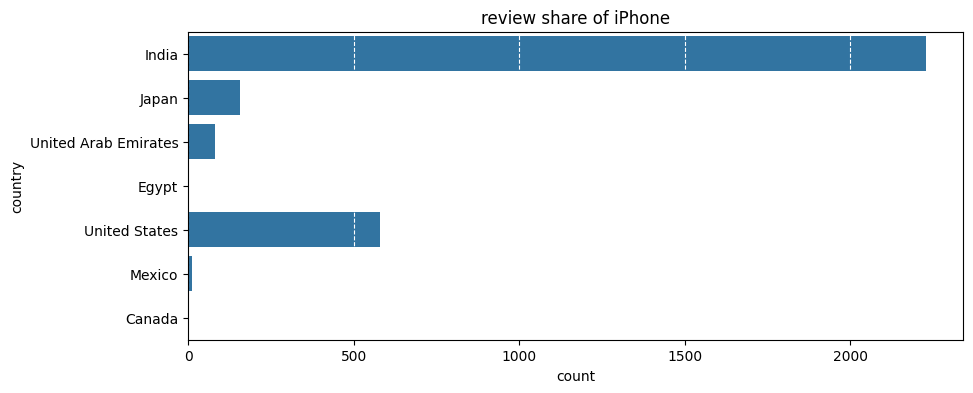

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(y='country', data=df)
plt.grid(axis='x',linestyle = "--", color ="white")
plt.title("review share of iPhone")
plt.show()

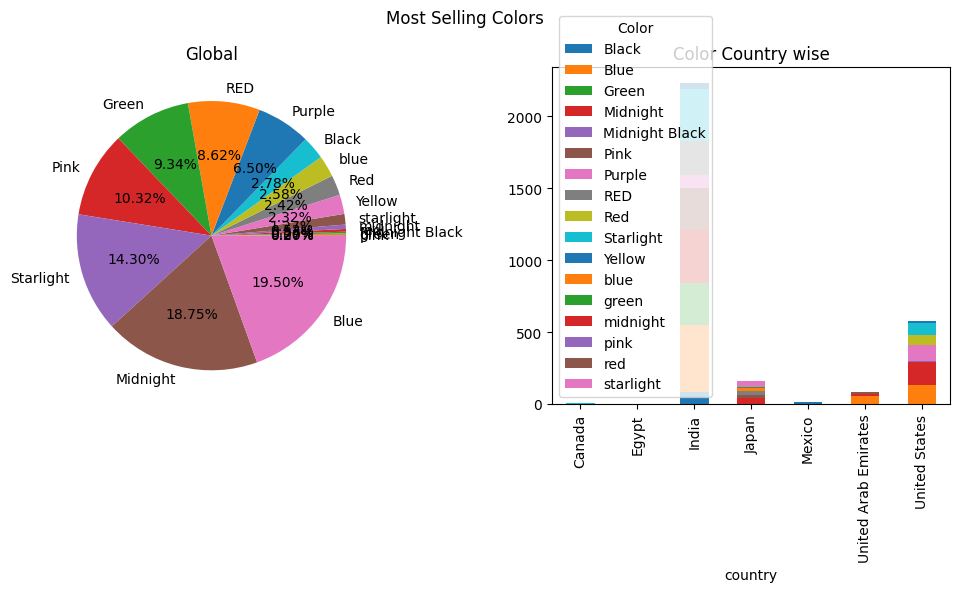

In [ ]:
#most selled color
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
g = df_2.groupby(by=['Color'])['productAsin'].agg(['count'])
g['percentage'] = round(100*g['count']/df_2.shape[0], 2)
g = g.sort_values(by='percentage')
ax[0].pie(x=g.percentage, labels=g.index, autopct='%.2f%%')
ax[0].set_title("Global")

#group by countries
g = df_2.pivot_table(values='productAsin', index=['country'], aggfunc='count', columns='Color', fill_value=0)
g.plot(kind='bar', stacked=True, ax=ax[1], title="Color Country wise")

plt.suptitle("Most Selling Colors")
plt.tight_layout()
plt.show()

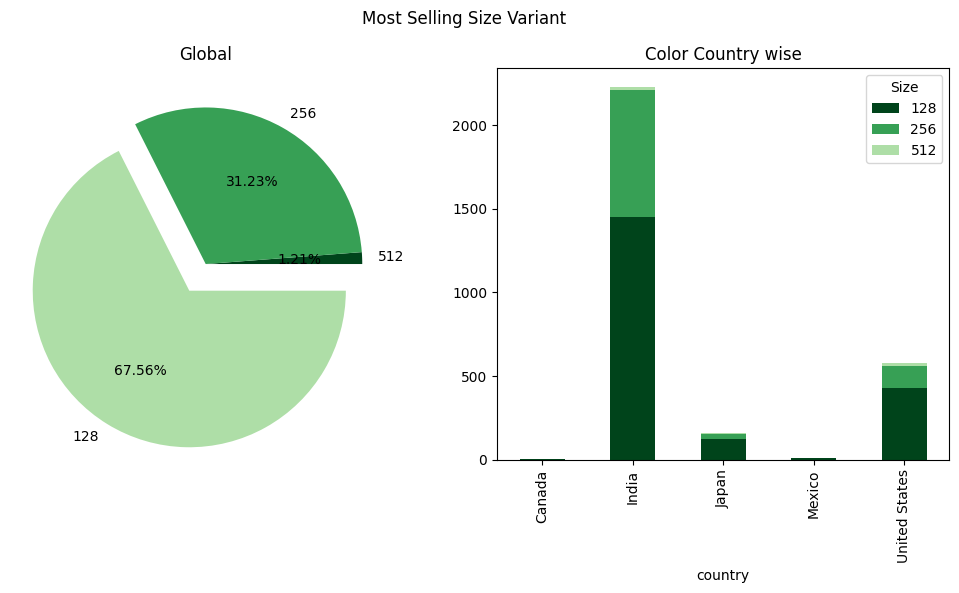

In [ ]:
#most selled color
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
g = df_2.groupby(by=['Size'])['productAsin'].agg(['count'])
g['percentage'] = round(100*g['count']/df_2.shape[0], 2)
g = g.sort_values(by='percentage')
ax[0].pie(x=g.percentage, labels=g.index, autopct='%.2f%%', explode=[0, 0, 0.2], colors=shade_greens(4))
ax[0].set_title("Global")

#group by countries
g = df_2.pivot_table(values='productAsin', index=['country'], aggfunc='count', columns='Size', fill_value=0)
g.plot(kind='bar', stacked=True, ax=ax[1], color=shade_greens(4), title="Color Country wise")

plt.suptitle("Most Selling Size Variant")
plt.tight_layout()
plt.show()

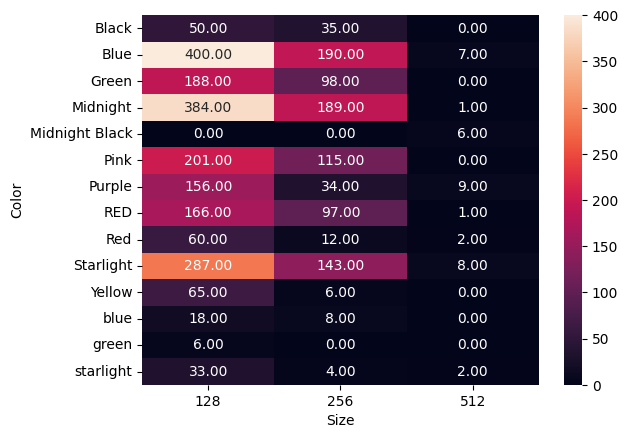

In [ ]:
g = df_2.pivot_table(index=['Color'], columns=['Size'], values=['productAsin'], aggfunc='count', fill_value=0)
sns.heatmap(g['productAsin'], annot=True, fmt='.2f')
plt.show()

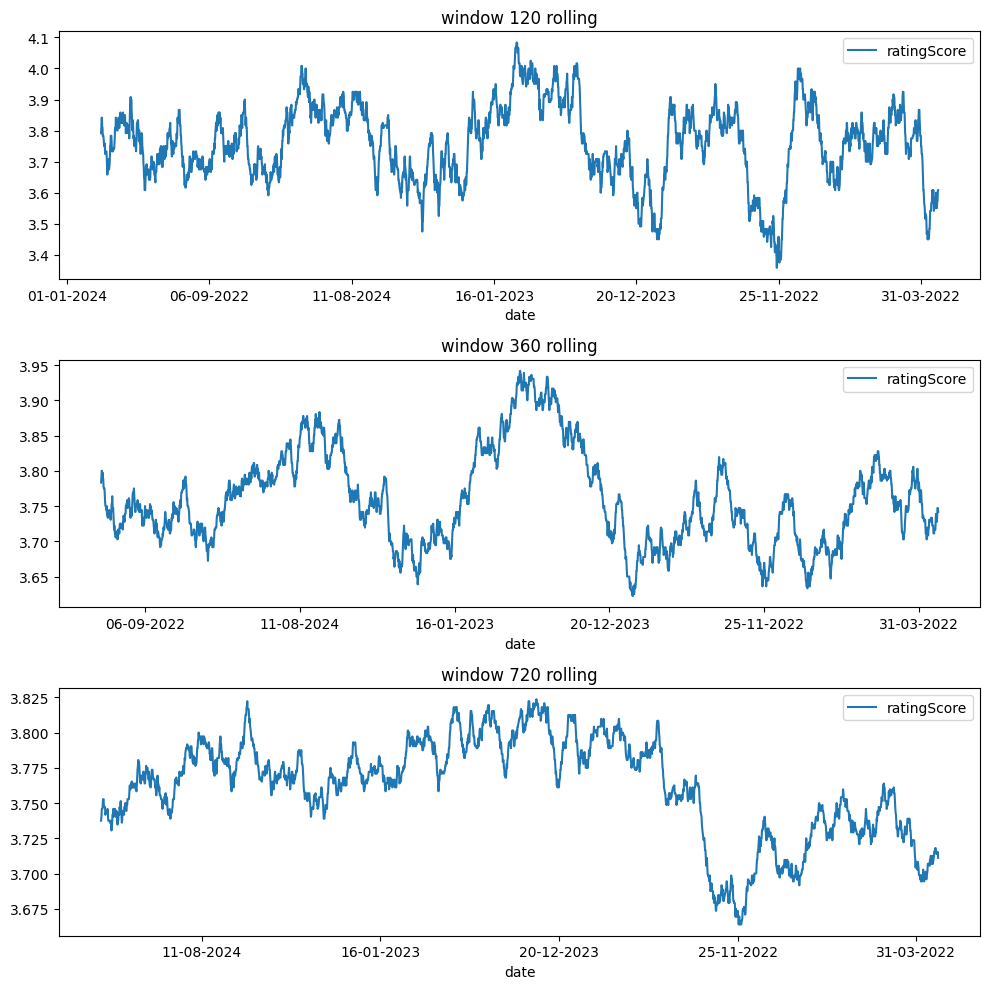

In [ ]:
from datetime import datetime
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
time_ratings = df[['date', 'ratingScore']].sort_values(by='date').set_index('date')
time_ratings.rolling(120).mean().plot(ax=ax[0], title='window 120 rolling')
ax[0].grid(axis='x', color='white', linestyle='--')
time_ratings.rolling(360).mean().plot(ax=ax[1], title='window 360 rolling')
ax[1].grid(axis='x', color='white', linestyle='--')
time_ratings.rolling(720).mean().plot(ax=ax[2], title='window 720 rolling')
ax[2].grid(axis='x', color='white', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
#adding features rating Category
df['IsPositiveRating'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)
df['RatingCategory'] = df['ratingScore'].apply(lambda x: 'Low' if x <= 2 else ('Medium' if x == 3 else 'High'))
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,IsPositiveRating,RatingCategory
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High


In [ ]:
df.dropna(inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))
def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r'<.*?>|[^\x00-\x7f]', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    stop_words = set(stopwords.words("english"))
    words = [word for word in text.split() if word not in stop_words]


    cleaned_text = ' '.join(words)

    return cleaned_text

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["reviewTitle"] = df["reviewTitle"].apply(text_preprocessing)
df["reviewDescription"] = df["reviewDescription"].apply(text_preprocessing)
df["reviewedIn"] = df["reviewedIn"].apply(text_preprocessing)

[('good', 1.0), ('iphone', 0.8095238095238095), ('phone', 0.7310924369747899), ('product', 0.45098039215686275), ('great', 0.3445378151260504), ('battery', 0.25210084033613445), ('apple', 0.23249299719887956), ('best', 0.23249299719887956), ('excellent', 0.22128851540616246), ('quality', 0.22128851540616246)]


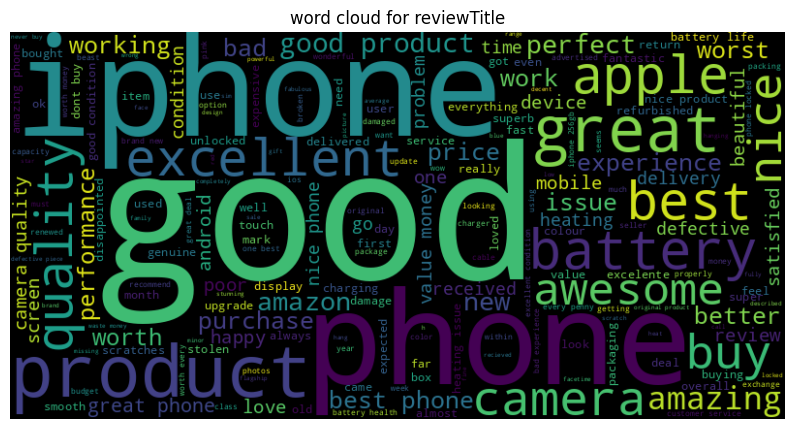

[('phone', 1.0), ('iphone', 0.6824276640790402), ('good', 0.429075511644319), ('apple', 0.29357798165137616), ('camera', 0.28793225123500354), ('amazon', 0.24347212420606917), ('product', 0.21877205363443897), ('battery', 0.21877205363443897), ('great', 0.20395201129146084), ('one', 0.17290049400141144)]


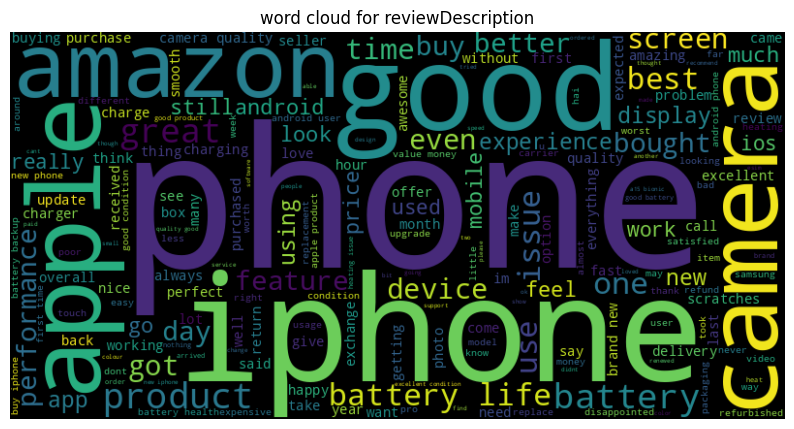

[('reviewed india', 1.0), ('reviewed united', 0.30568499534016774), ('united states', 0.2684063373718546), ('august reviewed', 0.16868592730661697), ('july reviewed', 0.16775396085740912), ('may reviewed', 0.1369990680335508), ('june reviewed', 0.13560111835973904), ('october reviewed', 0.1337371854613234), ('india august', 0.12301957129543337), ('september reviewed', 0.1211556383970177)]


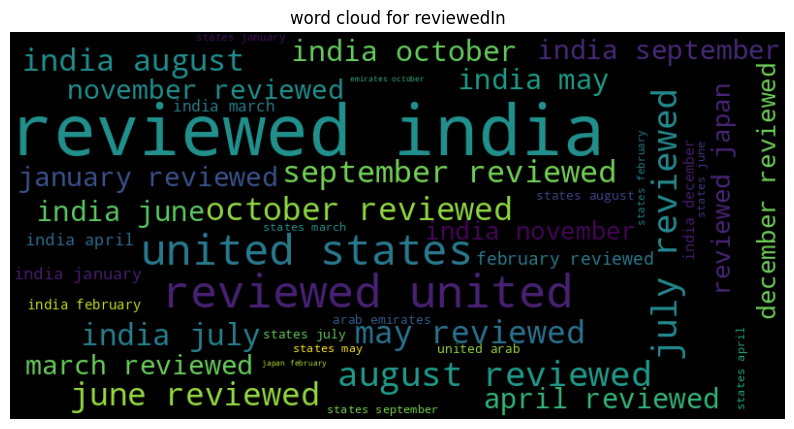

In [ ]:
text_columns = ['reviewTitle', 'reviewDescription', 'reviewedIn']

for col in text_columns:
    combined_text = ' '.join(df[col])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_text)

    # Extract the top 10 words
    word_counts = Counter(wordcloud.words_)
    top_10_words = word_counts.most_common(10)
    print(top_10_words)

    # Display the WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'word cloud for {col}')
    plt.axis('off')  # Remove axis
    plt.show()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

# Importing necessary libraries for machine learning and model evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model selection and splitting the dataset
from sklearn.model_selection import train_test_split

# TF-IDF vectorization for text data
from sklearn.feature_extraction.text import TfidfVectorizer

import time
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [ ]:
# Creating new combined text features for training and testing datasets
X = df['reviewDescription'] + ' ' + df['reviewTitle']
y = df['IsPositiveRating']
print(X.shape)
print(y.shape)

(2960,)
(2960,)


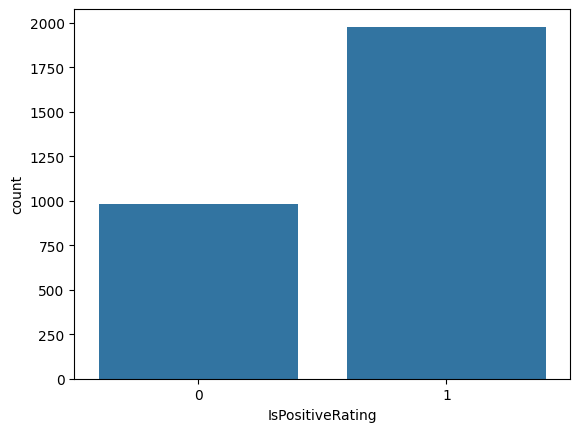

In [ ]:
#class imbalance
sns.countplot(x=y)
plt.show()

In [ ]:
#train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2368,)
(592,)


In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Initialize the lemmatizer
class Lemmatizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    # Function to convert nltk POS tags to WordNet POS tags
    def get_wordnet_pos(self, tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    def lemmatize(self, text):
        tokens = word_tokenize(text)
        tagged_tokens = pos_tag(tokens)
        lemmatized_tokens = []
        for token, tag in tagged_tokens:
            wordnet_pos = self.get_wordnet_pos(tag) or wordnet.NOUN
            lemma = self.lemmatizer.lemmatize(token, pos=wordnet_pos)
            lemmatized_tokens.append(lemma)

        return ' '.join(lemmatized_tokens)

text = "The striped bats are hanging on their feet for best"

my_lemmatizer = Lemmatizer()
lemmatized_text = my_lemmatizer.lemmatize(text)
print("Original Text:", text)
print("Lemmatized Text:", lemmatized_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original Text: The striped bats are hanging on their feet for best
Lemmatized Text: The striped bat be hang on their foot for best


In [ ]:
# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=Lemmatizer().lemmatize, ngram_range=(1, 2))

# Transforming the text data into TF-IDF vectors for both training and testing datasets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Only transform on test data

# Printing the shape of the resulting TF-IDF feature matrices
print("\nTF-IDF feature matrix shape for training data:", X_train_tfidf.shape)
print("TF-IDF feature matrix shape for test data:", X_test_tfidf.shape)


TF-IDF feature matrix shape for training data: (2368, 860)
TF-IDF feature matrix shape for test data: (592, 860)


In [ ]:
Best_acc = 0
best_class_report = 0
best_model = {}
results = []

models = {
    'Random Forest': RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "Multinomial NB": MultinomialNB()
}
# Iterate through the models, train them, and evaluate their performance
for name, model in models.items():
    start_time = time.time()

    # Train the model
    model.fit(X_train_tfidf, y_train)
    end_time = time.time()
    print(f"Training Time: {name} {end_time - start_time:.2f}")

    # Make predictions on the test set
    y_pred = model.predict(X_train_tfidf)

    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_train, y_pred)
    class_report = classification_report(y_train, y_pred, output_dict=True)

    # Store the results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score']
    })

    # Check for the best model
    if Best_acc < accuracy:
        Best_acc = accuracy
        best_model = model
        best_class_report = class_report

results_df = pd.DataFrame(results)

print(f"\nBest Model: {best_model}, Accuracy: {Best_acc}")

Training Time: Random Forest 8.27
Training Time: LogisticRegression 0.21
Training Time: AdaBoostClassifier 7.45
Training Time: Multinomial NB 0.01

Best Model: RandomForestClassifier(), Accuracy: 0.9961993243243243


In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.996199,0.996199,0.996199,0.996197
1,LogisticRegression,0.839105,0.843788,0.839105,0.829458
2,AdaBoostClassifier,0.852618,0.850353,0.852618,0.849981
3,Multinomial NB,0.704814,0.760823,0.704814,0.614847


In [ ]:
#final test set
y_pred = models['Random Forest'].predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70       209
           1       0.81      0.95      0.87       383

    accuracy                           0.82       592
   macro avg       0.84      0.77      0.79       592
weighted avg       0.83      0.82      0.81       592



In [ ]:
sample = ['iphone battery sucks, when ever i connect to charger it takes 2 hours to charge fully',
         'i love iphone but this time they have not good battery life',
         'This iphone camera is amazing, and so the color purple.',
         'iPhone is amazing',
         'Charger is so bad, i returned the order']
sample_y = [0, 0, 1, 1, 0]

sample_X = tfidf_vectorizer.transform(sample)
y_pred = models['Random Forest'].predict(sample_X)

print(f"{'Sample':<33} |{'Predict':<5}| {'Actual':<5}")
for s, y_, y in zip(sample, y_pred, sample_y):
    print(f"{s[:30]:<30}... | {y_:>5} | {y:>5}")

Sample                            |Predict| Actual
iphone battery sucks, when eve... |     0 |     0
i love iphone but this time th... |     1 |     0
This iphone camera is amazing,... |     1 |     1
iPhone is amazing             ... |     1 |     1
Charger is so bad, i returned ... |     0 |     0
